In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from collections import *
import seaborn as sns
%matplotlib inline

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


# Initial Analysis(Luda)

Initial analysis, playing around with data, plots, etc.

Note: much of the code taken from anokas's "Data Exploration & Analysis" Kernel on Kaggle.

Note: this assumes the data is in /data directory.


In [2]:
df_train = pd.read_csv('data/train.csv')
df_train.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [3]:
labels = df_train['tags'].apply(lambda x: x.split(' '))
counts = Counter()
for l in labels:
    for l2 in l:
        counts[l2] += 1

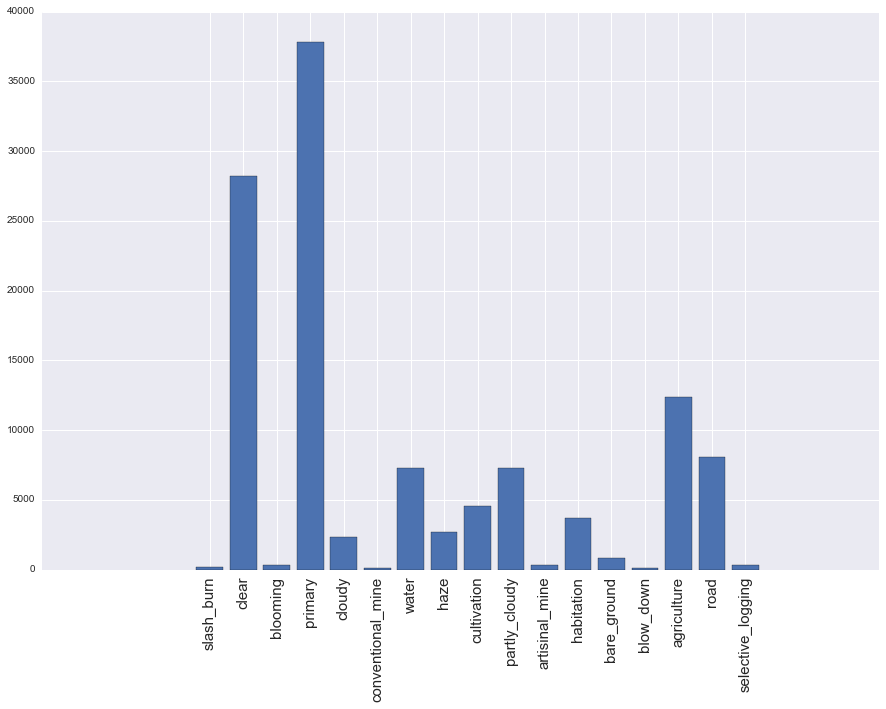

In [27]:
plt.bar(range(len(counts)), counts.values(), align='center')
plt.xticks(range(len(counts)), counts.keys(), rotation=90, fontsize=15)
plt.show()

In [7]:
# print distribution
c_sorted = zip(*list(counts.most_common()))

print zip(c_sorted[0], c_sorted[1])

[('primary', 37840), ('clear', 28203), ('agriculture', 12338), ('road', 8076), ('water', 7262), ('partly_cloudy', 7251), ('cultivation', 4547), ('habitation', 3662), ('haze', 2695), ('cloudy', 2330), ('bare_ground', 859), ('selective_logging', 340), ('artisinal_mine', 339), ('blooming', 332), ('slash_burn', 209), ('blow_down', 101), ('conventional_mine', 100)]


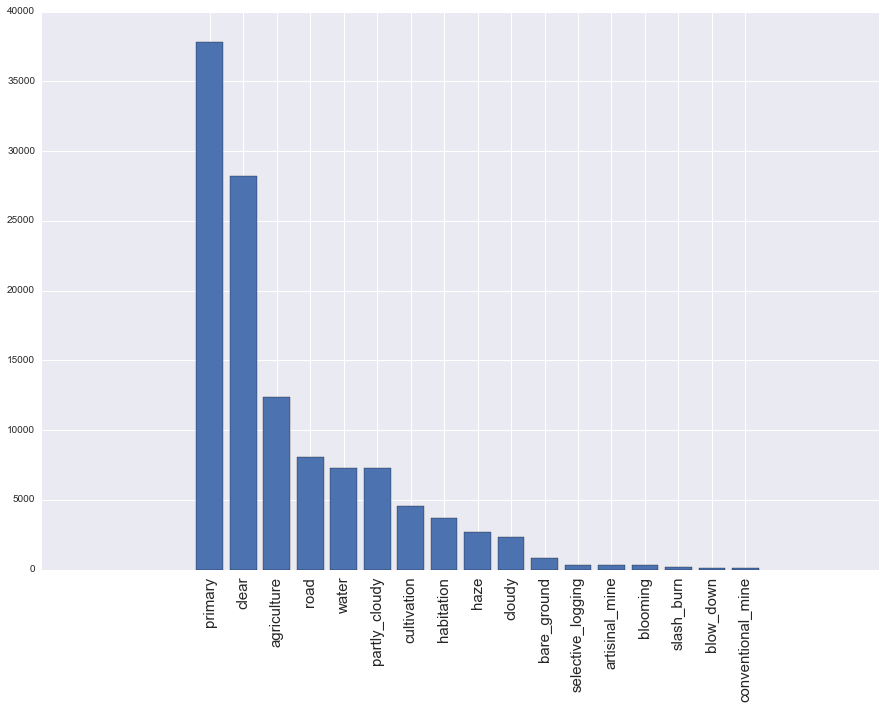

In [45]:
plt.bar(range(len(counts)), list(c_sorted[1]), align='center')
plt.xticks(range(len(counts)), list(c_sorted[0]), rotation=90, fontsize=15)
plt.show()

In [35]:
# Taken from Kernel
com = np.zeros([len(counts)]*2)
for i, l in enumerate(list(counts.keys())):
    for i2, l2 in enumerate(list(counts.keys())):
        c = 0
        cy = 0
        for row in labels.values:
            if l in row:
                c += 1
                if l2 in row: cy += 1
        com[i, i2] = cy / float(c)

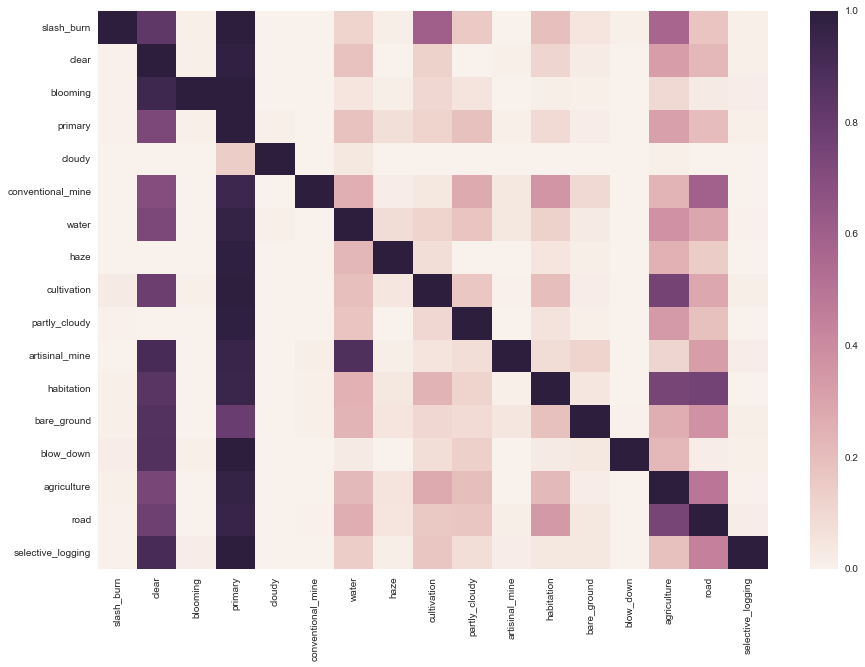

In [39]:
sns.heatmap(com, xticklabels=list(counts.keys()), yticklabels=list(counts.keys()))

In [3]:
from glob import glob
image_paths = sorted(glob('./data/train-jpg-sample/*.jpg'))
image_names = list(map(lambda row: row.split("/")[-1][:-4], image_paths))
image_names[0:10]

['train_0',
 'train_1',
 'train_10',
 'train_100',
 'train_1000',
 'train_10000',
 'train_10001',
 'train_10002',
 'train_10003',
 'train_10004']

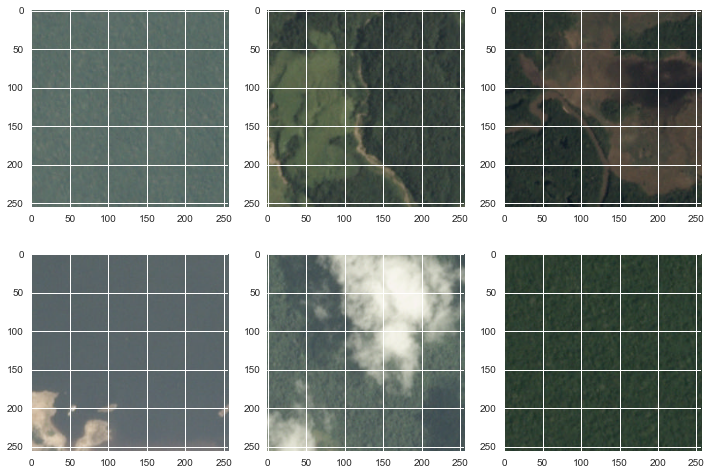

In [6]:
plt.figure(figsize=(12,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(plt.imread(image_paths[i]))